Name : Shivraj Ramesh Nalawade

PRN  : 202301060008

# **Practical Assignment 6: ClusteringAlgorithms**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import numpy as np

In [14]:
# 1. Load Data
df = pd.read_csv('Iris.csv')
print("Dataset Shape:", df.shape)

Dataset Shape: (150, 6)


In [15]:
# 2. Preprocessing
# Drop 'Id' and the label 'Species'
X = df.drop(['Id', 'Species'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# 3. Find Optimal K (Elbow Method)
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# We know Iris has 3 species, so we set optimal_k = 3
optimal_k = 3

In [17]:
# 4. Apply Clustering
# Algorithm A: K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Algorithm B: Agglomerative
agg = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg.fit_predict(X_scaled)

In [18]:
# 5. Evaluation Metrics
print("\n--- Evaluation Metrics (K=3) ---")

# Silhouette Score
k_sil = silhouette_score(X_scaled, kmeans_labels)
a_sil = silhouette_score(X_scaled, agg_labels)

print("K-Means Silhouette Score:", k_sil)
print("Agglomerative Silhouette Score:", a_sil)

# Davies-Bouldin Index
k_db = davies_bouldin_score(X_scaled, kmeans_labels)
a_db = davies_bouldin_score(X_scaled, agg_labels)

print("K-Means Davies-Bouldin Index:", k_db)
print("Agglomerative Davies-Bouldin Index:", a_db)


--- Evaluation Metrics (K=3) ---
K-Means Silhouette Score: 0.4589717867018717
Agglomerative Silhouette Score: 0.44553956399200406
K-Means Davies-Bouldin Index: 0.8354098493935598
Agglomerative Davies-Bouldin Index: 0.805940469032997


In [19]:
# 6. Visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['Cluster'] = kmeans_labels

plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

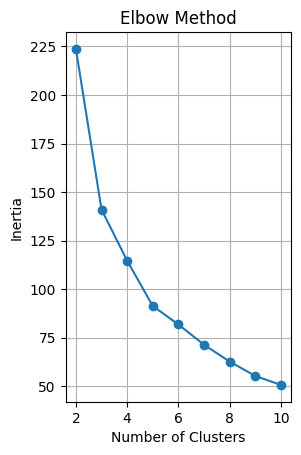

In [20]:
# Plot 1: Elbow
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

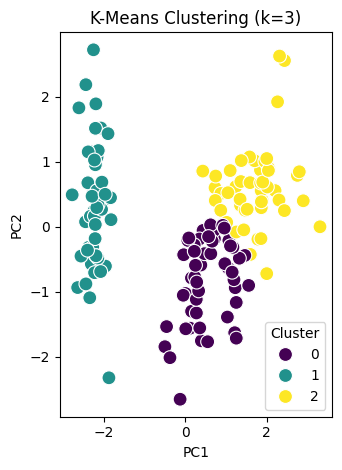

In [21]:
# Plot 2: Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering (k=' + str(optimal_k) + ')')

plt.tight_layout()
plt.show()